# Exploratory Data Analysis (EDA)

##### Authors: Diego Senso González, Luis Vaciero
##### 11 december 2020
##### Module: Machine Learning - Master's Degree Data Science for Finance

## Objective
The objective of this report is to do an EDA. During the analysis, we will delete different groups of variables in order to create different models and try to predict if one of our clients is going to pay back the loan we give.

## Dataset
Our dataset is formed by a number of clients who have a loan with us. Each combination represents a loan anddiffenrent data which we have about the client or about something related to the loan.

## Libraries

Firstly, we import the requested libraries for the EDA.

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

We load the four different datasets which have been gave to us to do this project and we join them in order to work easier with all this data. Also, we can check the dataset to get a first idea about the data.

In [171]:
loan = pd.read_csv("../data/Loan_training_set_1_4.csv", delimiter = ';')
loan2 = pd.read_csv("../data/Loan_training_set_2_4.csv", delimiter = ';')
loan3 = pd.read_csv("../data/Loan_training_set_3_4.csv", delimiter = ';')
loan4 = pd.read_csv("../data/Loan_training_set_4_4.csv", delimiter = ';')
loan = pd.concat([loan, loan2, loan3, loan4])
loan

C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,19,129,130,131,134,135,136,139) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0,19,59) have mixed

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,112435993,NaN,2300.0,2300.0,2300.0,36 months,12.62%,77.08,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,112290210,NaN,16000.0,16000.0,16000.0,60 months,12.62%,360.95,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,112436985,NaN,6025.0,6025.0,6025.0,36 months,15.05%,209.01,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,112439006,NaN,20400.0,20400.0,20400.0,36 months,9.44%,652.91,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,112438929,NaN,13000.0,13000.0,13000.0,36 months,11.99%,431.73,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421092,36271333,NaN,13000.0,13000.0,13000.0,60 months,15.99%,316.07,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421093,36490806,NaN,12000.0,12000.0,12000.0,60 months,19.99%,317.86,E,E3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421094,36271262,NaN,20000.0,20000.0,20000.0,36 months,11.99%,664.20,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
421095,Total amount funded in policy code 1: 6417608175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## First exploration
As a first step, we choose to see the shape and size of the dataset to get a clear idea about the dimensions of the data which we are going to study.

In [172]:
loan.shape

(884888, 151)

In [173]:
loan.size

133618088

Thanks to "info" function we can get valuable info. We can see the total number of observations,variables, and which is the format of the columns we are going to find afterwards.

In [174]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884888 entries, 0 to 421096
Columns: 151 entries, id to settlement_term
dtypes: float64(111), object(40)
memory usage: 1.0+ GB


We see the values of the loan_status columns, which is the variable we will try to predict.

In [175]:
loan['loan_status'].value_counts(dropna=False)

Current               422650
Fully Paid            345472
Charged Off            97039
Late (31-120 days)     11167
In Grace Period         5507
Late (16-30 days)       2915
NaN                      104
Default                   34
Name: loan_status, dtype: int64

After that, we delete the rows where the loan is currently being paid, because we do not know yet if the loan will be paid or not.

In [176]:
f0 = loan['loan_status'] != 'Current'
loan = loan[f0]

Now that we have the observations in which we are interested, we delete the duplicate data if there is some of it in the dataset.

In [177]:
loan = loan.drop_duplicates()

During the next steps, we are going to exclude variables from the model according to differents reasons which will be detailed in each section.

## First discard: Variables which we could not know before the loan was conceeded
Firstly, we have to delete from the model those variables which we did not know in the moment when the bank conceeded the loan to the client. If the aim of this project is to predict if the client is going to pay, we cannot use variables which we only can obtain in the future.

In [178]:
loan = loan.drop(columns = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'open_rv_12m', 'open_rv_24m', 'inq_last_12m', 'acc_open_past_24mths', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'mths_since_last_major_derog', 'acc_now_delinq'])

## Second discard: Variables with high proportion of NA values.
Secondly, in some cases it is not appropriate to include in the model variables with lots of unknown values.

In [179]:
#Percentage of NA values
percentage_NaN = loan.apply(lambda x:sum(x.isna()/len(loan)))
percentage_NaN.sort_values(ascending = False).head(60)

member_id                                     1.000000
sec_app_mths_since_last_major_derog           0.998771
orig_projected_additional_accrued_interest    0.997986
hardship_end_date                             0.997175
hardship_dpd                                  0.997175
hardship_reason                               0.997175
hardship_status                               0.997175
deferral_term                                 0.997175
hardship_amount                               0.997175
hardship_start_date                           0.997175
payment_plan_start_date                       0.997175
hardship_length                               0.997175
hardship_loan_status                          0.997175
hardship_payoff_balance_amount                0.997175
hardship_last_payment_amount                  0.997175
hardship_type                                 0.997175
sec_app_revol_util                            0.997036
sec_app_inq_last_6mths                        0.996963
sec_app_co

Once we observed which variables meet this conditions, we proceed to delete them from the model.

In [180]:
loan = loan.drop(columns = ['settlement_term', 'hardship_dpd', 'desc', 'settlement_percentage', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_type','hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'member_id', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'orig_projected_additional_accrued_interest', 'settlement_amount', 'sec_app_mths_since_last_major_derog', 'sec_app_revol_util', 'revol_bal_joint', 'sec_app_fico_range_low', 'dti_joint', 'annual_inc_joint', 'verification_status_joint', 'sec_app_fico_range_high', 'il_util', 'all_util', 'total_bal_il', 'open_act_il', 'total_cu_tl', 'max_bal_bc', 'inq_fi', 'sec_app_earliest_cr_line'])

However, it has been decided to keep some of this variables inside the model. This is because some of these variables refer to different aspects about joint loans. Since most of the loans are individual, it is logical that these variables have lots of NA values, but we think that some of them can be important so we maintain these in the model. Those variables are:

 - 'sec_app_mort_acc',
 - 'sec_app_open_acc',
 - 'sec_app_open_act_il',
 - 'sec_app_num_rev_accts',
 - 'sec_app_chargeoff_within_12_mths',
 - 'sec_app_collections_12_mths_ex_med',
 - 'sec_app_inq_last_6mths', 
 - 'mths_since_last_major_derog'

To keep them, we fill NA values with zeros. This will indicate clearly which loan are individual and which of them are joint.

In [181]:
loan = loan.fillna(value = {'sec_app_mort_acc': 0, 'sec_app_open_acc': 0, 'sec_app_open_act_il':0, 'sec_app_num_rev_accts':0, 'sec_app_chargeoff_within_12_mths':0, 'sec_app_collections_12_mths_ex_med':0, 'sec_app_inq_last_6mths': 0, 'mths_since_last_major_derog':0})

After this, we decide to treat numeric and categorical variables separatedly in order to fill the rest of NA values inside the dataset. Specifically, we fill with the mean value the NA values inside numeric variables. Also, we put the most repeated value inside categorical variables.

In [182]:
numerical = loan.select_dtypes(include = [np.number])
numerical = numerical.apply(lambda x: x.replace("", np.nan))
numerical = numerical.apply(lambda x: x.fillna(x.mean()))

In [183]:
categorical = loan.select_dtypes(include = [np.object])
categorical = categorical.apply(lambda x: x.replace("", np.nan))
categorical = categorical.apply(lambda x: x.fillna(x.value_counts().index[0]))

## Third discard: Variables with high correlation
In case of two or more high correlated variables inside the dataset, we decide to exclude some of them to not have several variables explaining very similar things. We check the correlation:

In [185]:
loan.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,pub_rec,...,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med
loan_amnt,1.000000,1.000000,0.999996,0.951741,0.334155,0.019780,0.130334,0.130332,0.189023,-0.095320,...,0.287485,0.391036,0.202987,0.014564,0.028447,0.033927,0.020864,0.033348,-0.000995,-0.000401
funded_amnt,1.000000,1.000000,0.999996,0.951741,0.334155,0.019780,0.130334,0.130332,0.189023,-0.095320,...,0.287485,0.391036,0.202987,0.014564,0.028447,0.033927,0.020864,0.033348,-0.000995,-0.000401
funded_amnt_inv,0.999996,0.999996,1.000000,0.951724,0.334199,0.019689,0.130455,0.130454,0.189022,-0.095324,...,0.287479,0.391098,0.202980,0.014570,0.028444,0.033931,0.020869,0.033349,-0.001000,-0.000399
installment,0.951741,0.951741,0.951724,1.000000,0.327075,0.013658,0.088948,0.088947,0.175231,-0.081761,...,0.268169,0.360540,0.184547,0.015260,0.027026,0.033834,0.020786,0.033216,0.000362,0.000923
annual_inc,0.334155,0.334155,0.334199,0.327075,1.000000,-0.181294,0.089695,0.089696,0.128118,-0.014069,...,0.320643,0.278896,0.262469,-0.011090,-0.010843,-0.014228,-0.011842,-0.013656,-0.002441,-0.003876
dti,0.019780,0.019780,0.019689,0.013658,-0.181294,1.000000,-0.057663,-0.057666,0.265729,-0.056960,...,0.267480,0.026735,0.303197,0.056589,0.069983,0.080272,0.062460,0.076906,0.009274,0.017494
fico_range_low,0.130334,0.130334,0.130455,0.088948,0.089695,-0.057663,1.000000,1.000000,0.039280,-0.198759,...,0.049976,0.381347,0.066826,0.011420,0.008598,0.013623,0.012071,0.012637,0.005065,0.008367
fico_range_high,0.130332,0.130332,0.130454,0.088947,0.089696,-0.057666,1.000000,1.000000,0.039278,-0.198757,...,0.049974,0.381346,0.066825,0.011420,0.008598,0.013623,0.012071,0.012637,0.005065,0.008367
open_acc,0.189023,0.189023,0.189022,0.175231,0.128118,0.265729,0.039280,0.039278,1.000000,-0.036369,...,0.398678,0.341905,0.359402,-0.001277,-0.000193,0.004367,-0.001878,0.004097,-0.003272,-0.005390
pub_rec,-0.095320,-0.095320,-0.095324,-0.081761,-0.014069,-0.056960,-0.198759,-0.198757,-0.036369,1.000000,...,-0.073765,-0.149367,-0.031214,-0.000115,0.000345,-0.000463,-0.000532,-0.001223,-0.002308,-0.001279


We delete the variables which we see high correlated and not interesting for our model, regarding on the variables which we keep. 

In [186]:
loan = loan.drop(columns = ['loan_amnt', 'funded_amnt_inv', 'num_sats', 'total_bal_ex_mort'])

## Fourth discard: Own criteria
In the last step of variable deletion, not all the variables are useful to explain and predict if a cliente is going to pay. Because of this, we delete those variables which we did not consider relevant for the model.

In [187]:
loan = loan.drop(columns = ['id', 'sub_grade', 'emp_title', 'issue_d', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'fico_range_high', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'collections_12_mths_ex_med', 'pymnt_plan', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag'])

Now, we can check the finally list of variables which we have chosen to do the EDA and start to work with prediction models.

In [188]:
list(loan)

['funded_amnt',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'dti',
 'fico_range_low',
 'open_acc',
 'pub_rec',
 'policy_code',
 'application_type',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mort_acc',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 'pub_rec_bankruptcies',
 'tax_liens',
 'tot_hi_cred_lim',
 'total_bc_limit',
 'total_il_high_credit_limit',
 'sec_app_inq_last_6mths',
 'sec_app_mort_acc',
 'sec_app_open_acc',
 'sec_app_open_act_il',
 'sec_app_num_rev_accts',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med']

Now we drop NA values in order to explore better data.

In [189]:
loan = loan.dropna()
loan

,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med
8,11575.0,36 months,7.35%,359.26,A,6 years,OWN,153000.0,Not Verified,Fully Paid,...,528172.0,28100.0,120572.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,7200.0,36 months,24.85%,285.70,E,2 years,RENT,50000.0,Source Verified,Fully Paid,...,7600.0,3600.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,7500.0,36 months,7.35%,232.79,A,7 years,MORTGAGE,110000.0,Not Verified,Fully Paid,...,350617.0,83700.0,32239.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,10000.0,60 months,16.02%,243.29,C,7 years,RENT,51979.0,Source Verified,Fully Paid,...,34200.0,18800.0,5500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,14000.0,36 months,16.02%,492.34,C,7 years,MORTGAGE,75000.0,Verified,Fully Paid,...,170591.0,3000.0,30321.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575.0,36 months,15.59%,404.61,D,10+ years,RENT,25400.0,Verified,Fully Paid,...,29866.0,27500.0,1766.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421089,12000.0,36 months,11.99%,398.52,B,< 1 year,MORTGAGE,63000.0,Verified,Charged Off,...,325484.0,15400.0,98125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421092,13000.0,60 months,15.99%,316.07,D,5 years,RENT,35000.0,Verified,Charged Off,...,51239.0,10600.0,33239.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421093,12000.0,60 months,19.99%,317.86,E,1 year,RENT,64400.0,Source Verified,Charged Off,...,96919.0,9700.0,69919.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Representation of categorical variables
After all previous steps, we are going to study the categorical variables in order to see which values they take and how they react. First, it is specially important to check which are the possible values for our variable to predict:

In [190]:
loan['loan_status'].value_counts()

Fully Paid            324577
Charged Off            89012
Late (31-120 days)     10276
In Grace Period         5168
Late (16-30 days)       2665
Default                   31
Name: loan_status, dtype: int64

We see the different grades of the loan. This is a measure which is related to the interest rate.

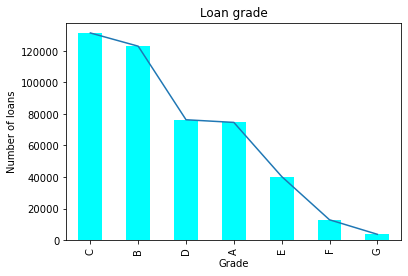

In [43]:
(loan['grade'].value_counts()).plot()
(loan['grade'].value_counts()).plot(kind = "bar", color = "cyan")

plt.title('Loan grade')
plt.xlabel('Grade') 
plt.ylabel('Number of loans');

We compare if the borrower owns the house he is living in, if is rented, or if he is paying the mortgage.

C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

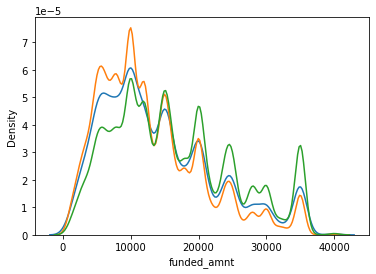

In [50]:
sns.distplot(loan.query("home_ownership == 'OWN'").funded_amnt,hist=False)
sns.distplot(loan.query("home_ownership == 'RENT'").funded_amnt,hist=False)
sns.distplot(loan.query("home_ownership == 'MORTGAGE'").funded_amnt,hist=False);

Now we can see the relation between the loan amount and the time the borrower has been in his job. There are not huge differences.

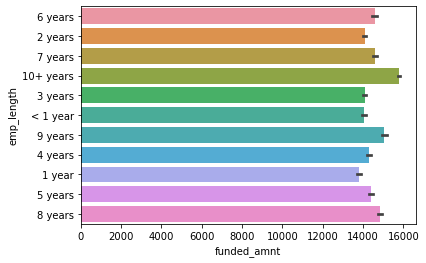

In [51]:
sns.barplot(x="funded_amnt", y="emp_length", data=loan, estimator=np.mean);

This boxplot shows the quartiles, median and outliers from loans with 36 or 60 months of term to pay back the loan. As we can see, there are several outliers in 36 months' loans. Moreover, we can see that the amount given is generally bigger in 60 months' loans.

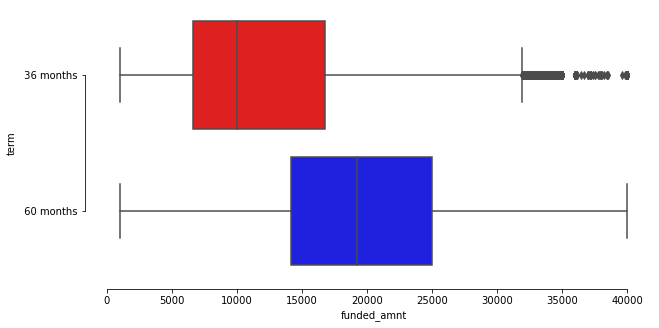

In [52]:
f, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x = 'funded_amnt', y = 'term',
            palette=["r", "b"],
            data=loan)
sns.despine(offset=10, trim=True)

Now we see if the borrower is propietary of his house, or if he is not and is paying for a rent or a mortgage. The conclusion is that "OWN" is the less frequent value. In small amounts of loan, "RENT" is more popular. When the loan amount is higher, "MORTGAGE" is the most repeated value.

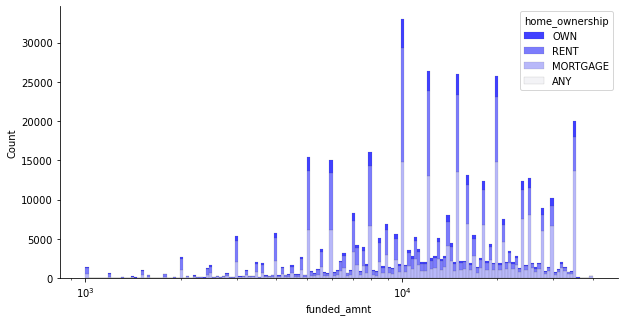

In [53]:
f, ax = plt.subplots(figsize=(10, 5))
sns.despine(f)

sns.histplot(
    loan,
    x="funded_amnt", hue="home_ownership",
    multiple="stack",
    palette="light:b_r",
    edgecolor=".3",
    linewidth=.1,
    log_scale=True,
);

Now we can see a comparison between the amount of loans given with 36 months and 60 months term. It looks clear that longer loans are dedicated to bigger amounts of money. For small amounts of funded amount, tha bank only gives loans with 36 months term.

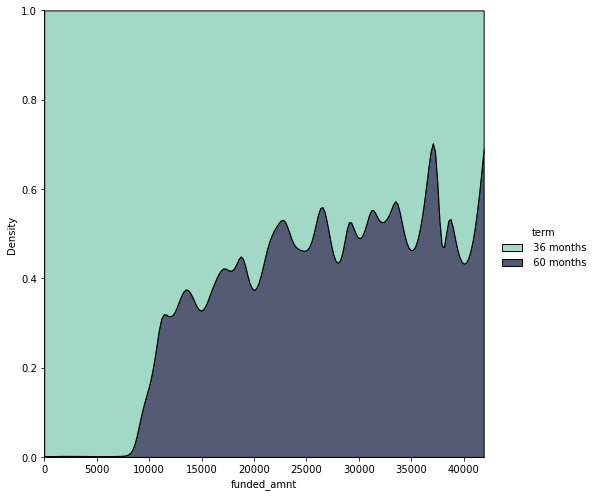

In [54]:
sns.displot(
    data=loan,
    x="funded_amnt", hue="term",
    kind="kde", height=7,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.35,hue=1,light=.70",
);

Lastly, we can see that there is some little difference between the loan value and if the information which the bank receives from the borrower y totally verified or not. Obviously, the bank do not usually conceed high value loans in cases in which the information about the client is not realiable.

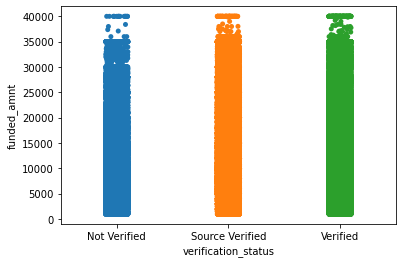

In [55]:
sns.stripplot(x="verification_status", y="funded_amnt", data=loan);

## Representation of numeric variables

We do a first approach thaks to "describe" function, which allows us to see the main measures from the numeric variables. This is helpful to get a quick idea about the data.

In [56]:
loan.describe()

,funded_amnt,installment,annual_inc,dti,fico_range_low,open_acc,pub_rec,policy_code,tot_coll_amt,tot_cur_bal,...,tot_hi_cred_lim,total_bc_limit,total_il_high_credit_limit,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med
count,462226.000000,462226.000000,4.621340e+05,461802.000000,461823.000000,461823.000000,461823.000000,461823.0,4.618230e+05,4.618230e+05,...,4.618230e+05,461823.000000,4.618230e+05,462235.000000,462235.000000,462235.000000,462235.000000,462235.000000,462235.000000,462235.000000
mean,14635.806727,441.393433,7.562116e+04,18.449881,692.876026,11.809425,0.239111,1.0,2.721807e+02,1.392961e+05,...,1.708516e+05,20509.044879,4.176822e+04,0.002639,0.005032,0.033918,0.009201,0.037641,0.000294,0.000456
std,8528.104019,253.167532,6.604831e+04,8.828021,30.149084,5.472637,0.633406,0.0,1.363395e+04,1.544223e+05,...,1.734636e+05,20796.398895,4.255447e+04,0.080974,0.136768,0.713938,0.256367,0.816346,0.028896,0.035935
min,1000.000000,14.010000,0.000000e+00,0.000000,660.000000,0.000000,0.000000,1.0,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,258.100000,4.569000e+04,12.120000,670.000000,8.000000,0.000000,1.0,0.000000e+00,2.983900e+04,...,4.887700e+04,7100.000000,1.493100e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12600.000000,380.660000,6.500000e+04,17.920000,685.000000,11.000000,0.000000,1.0,0.000000e+00,7.939200e+04,...,1.097640e+05,14100.000000,3.163900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20000.000000,581.450000,9.000000e+04,24.370000,705.000000,15.000000,0.000000,1.0,0.000000e+00,2.075070e+05,...,2.470600e+05,26600.000000,5.599700e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40000.000000,1719.830000,9.500000e+06,999.000000,845.000000,90.000000,86.000000,1.0,9.152545e+06,4.026405e+06,...,9.999999e+06,760000.000000,2.101913e+06,6.000000,13.000000,46.000000,29.000000,84.000000,10.000000,10.000000


We can see a graphical representation of all numeric variables together. Mainly, this is a good way to see how the different variables are distributed.

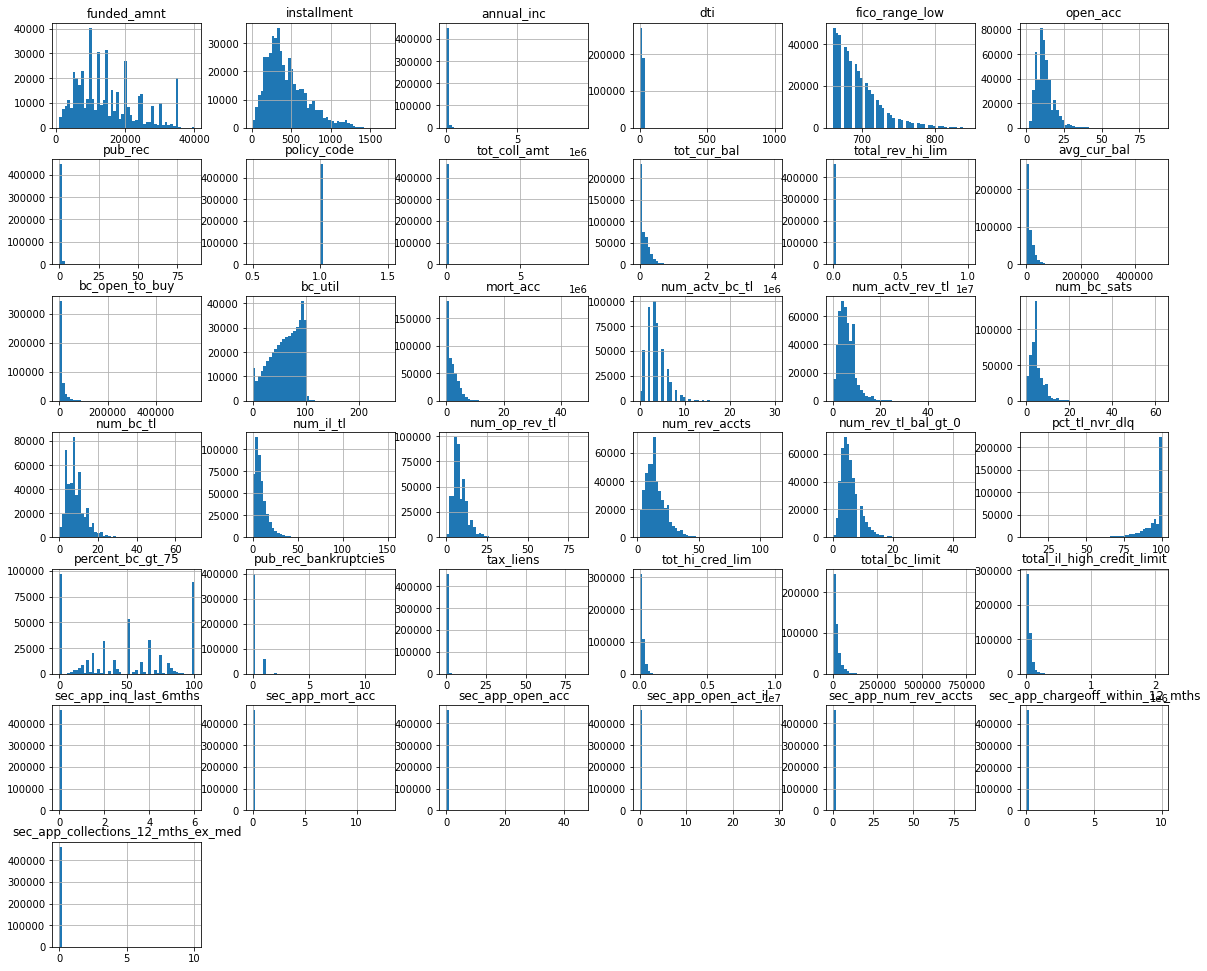

In [57]:
loan.iloc[:,0:45].hist(bins=50, figsize=(20,17))
plt.show()

After this general idea, we build some graphs to see the variables "funded_amnt" (money given to the borrower) compared to different numeric variables.

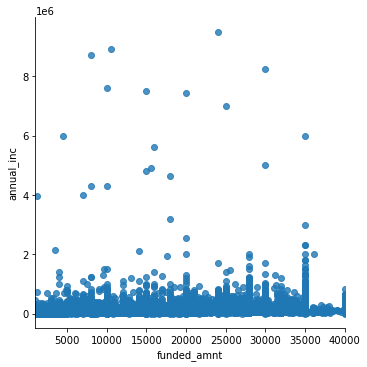

In [60]:
sns.lmplot(x="funded_amnt", y="annual_inc",
           data=loan);

C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


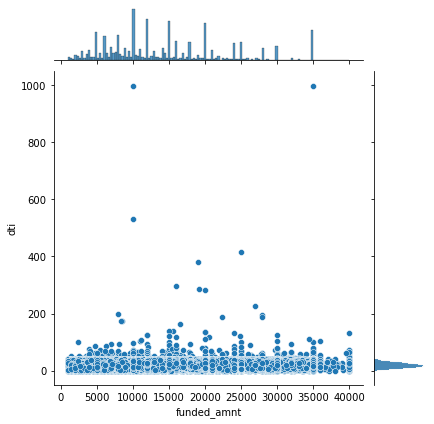

In [65]:
sns.jointplot("funded_amnt", "dti", data=loan);

C:\Users\diego\anaconda3\envs\eda_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


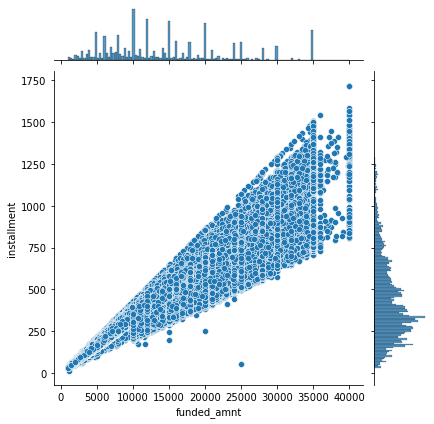

In [62]:
sns.jointplot("funded_amnt", "installment", data=loan);

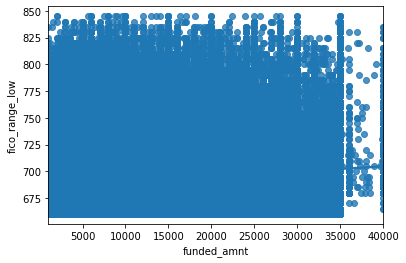

In [63]:
sns.regplot(x="funded_amnt", y="fico_range_low", data=loan);

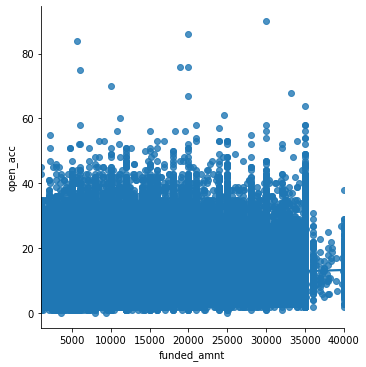

In [64]:
sns.lmplot(x="funded_amnt", y="open_acc", data=loan, lowess=True);

### Correlation

To conclude the analysis of numeric variables, we represent the correlation. We have a big number of variables, so we will see correlations of some variables by smaller groups.

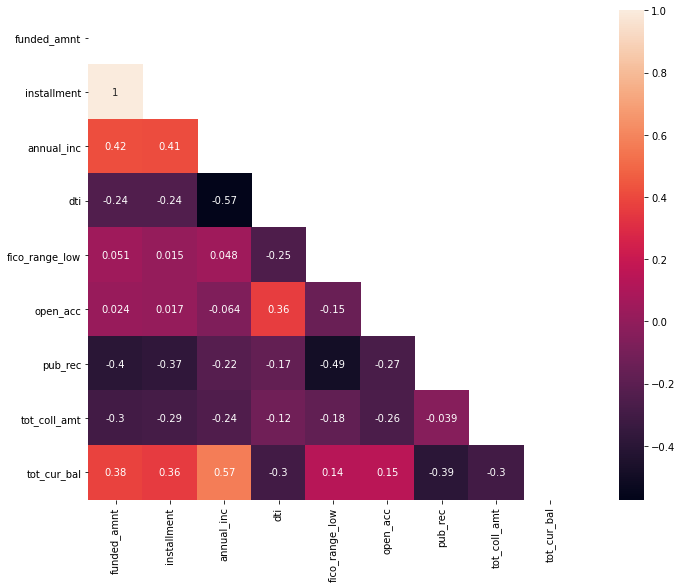

In [200]:
corr1 = loan.loc[:,['funded_amnt','installment','annual_inc','dti',
                      'fico_range_low','open_acc','pub_rec','tot_coll_amt','tot_cur_bal']]
corr1 = corr1.corr()

mask= np.zeros_like(corr1.corr())
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr1.corr(),annot=True, mask=mask, vmax=1, square=True);

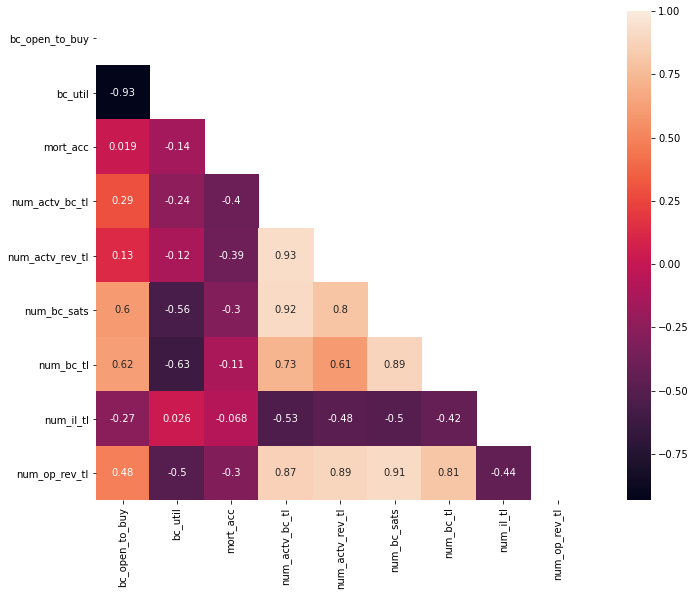

In [206]:
corr3 = loan.loc[:,['bc_open_to_buy','bc_util','mort_acc', 'num_actv_bc_tl',
                      'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl']]
corr3 = corr3.corr()

mask= np.zeros_like(corr3.corr())
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr3.corr(),annot=True, mask=mask, vmax=1, square=True);

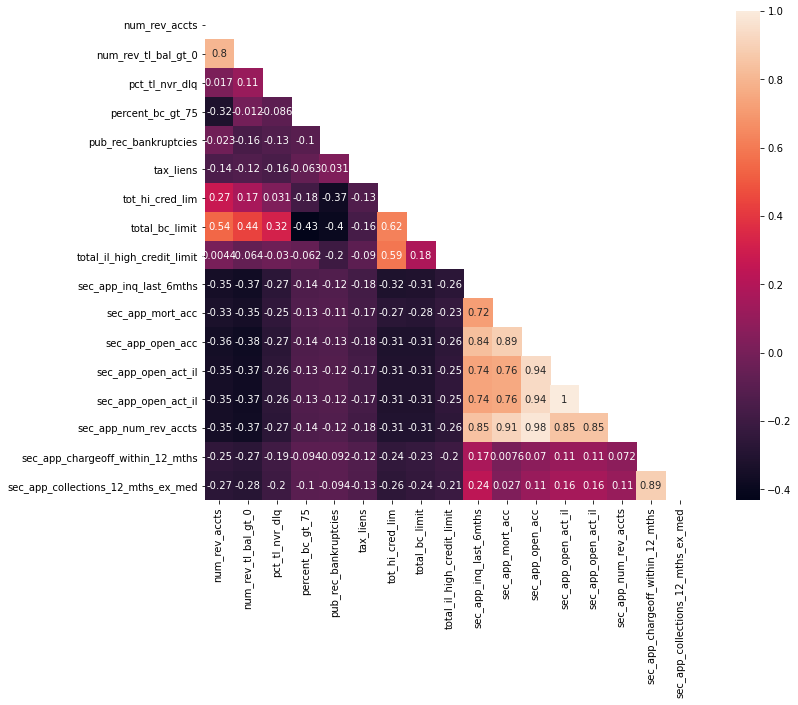

In [203]:
corr3 = loan.loc[:,['num_rev_accts','num_rev_tl_bal_gt_0','pct_tl_nvr_dlq', 'percent_bc_gt_75',
                      'pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bc_limit','total_il_high_credit_limit'
                   , 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_open_act_il',
                   'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med']]
corr3 = corr3.corr()

mask= np.zeros_like(corr3.corr())
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr3.corr(),annot=True, mask=mask, vmax=1, square=True);